# 例子3 结果可视化

### 建造一个完整的神经网络,  包括  添加神经层  ,  计算误差  ,  训练步骤  ,  判断是否在学习.

In [4]:
import tensorflow as tf
import numpy as np

## 神经层函数（详见上一课）

In [5]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## 导入数据

这里的x_data和y_data并不是严格的一元二次函数的关系，

因为我们多加了一个noise

In [6]:
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]

In [7]:
x_data[:5]

array([[-1.        ],
       [-0.99331105],
       [-0.9866221 ],
       [-0.97993308],
       [-0.97324413]], dtype=float32)

In [8]:
print(np.newaxis)

None


In [9]:
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)

In [10]:
noise[:5]

array([[ 0.01236983],
       [-0.01578478],
       [-0.00492519],
       [-0.05211922],
       [-0.00849718]], dtype=float32)

In [11]:
x_data.shape

(300, 1)

In [12]:
np.random.normal(0, 1, 10)

array([ 0.11041462, -0.42555939,  0.75428554, -0.47807118,  0.70775986,
        1.48810194,  1.82797714, -0.96472175,  0.13860713,  0.87405812])

In [13]:
np.linspace(-1,1,10, dtype=np.float32)

array([-1.        , -0.77777779, -0.55555558, -0.33333334, -0.11111111,
        0.11111111,  0.33333334,  0.55555558,  0.77777779,  1.        ], dtype=float32)

In [14]:
np.linspace(-1,1,10, dtype=np.float32)[:, np.newaxis]

array([[-1.        ],
       [-0.77777779],
       [-0.55555558],
       [-0.33333334],
       [-0.11111111],
       [ 0.11111111],
       [ 0.33333334],
       [ 0.55555558],
       [ 0.77777779],
       [ 1.        ]], dtype=float32)

In [15]:
np.linspace(-1,1,10, dtype=np.float32)[:]

array([-1.        , -0.77777779, -0.55555558, -0.33333334, -0.11111111,
        0.11111111,  0.33333334,  0.55555558,  0.77777779,  1.        ], dtype=float32)

In [16]:
np.linspace(-1,1,10, dtype=np.float32)[:,]

array([-1.        , -0.77777779, -0.55555558, -0.33333334, -0.11111111,
        0.11111111,  0.33333334,  0.55555558,  0.77777779,  1.        ], dtype=float32)

In [17]:
np.linspace(-1,1,10, dtype=np.float32)[:, None]

array([[-1.        ],
       [-0.77777779],
       [-0.55555558],
       [-0.33333334],
       [-0.11111111],
       [ 0.11111111],
       [ 0.33333334],
       [ 0.55555558],
       [ 0.77777779],
       [ 1.        ]], dtype=float32)

In [18]:
y_data = np.square(x_data) - 0.5 + noise

In [19]:
y_data[:5]

array([[ 0.51236981],
       [ 0.47088209],
       [ 0.46849799],
       [ 0.40814963],
       [ 0.43870693]], dtype=float32)

利用占位符定义我们所需的神经网络的输入。 tf.placeholder()就是代表占位符，

这里的None代表无论输入有多少都可以，

因为输入只有一个特征，所以这里是1


In [20]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

## 定义神经层

通常神经层都包括输入层、隐藏层和输出层。

In [21]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

这里使用 Tensorflow 自带的激励函数tf.nn.relu。

## 定义输出层

In [22]:
prediction = add_layer(l1, 10, 1, activation_function=None)

计算预测值prediction和真实值的误差，对二者

### 差的平方求和再取平均

In [23]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))

tf.train.GradientDescentOptimizer()中的值通常都小于1，这里取的是0.1，代表以0.1的效率来最小化误差loss。

In [24]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [25]:
init = tf.global_variables_initializer()

### 定义Session，并用 Session 来执行 init 初始化步骤。

In [26]:
sess = tf.Session()
sess.run(init)

## 训练

In [27]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.603462
0.0354795
0.0238329
0.0128217
0.00773649
0.00602946
0.00523043
0.00481112
0.0045428
0.00436956
0.00425558
0.00417253
0.00410401
0.00403293
0.00395842
0.0038896
0.00380764
0.0037214
0.0036385
0.00356918


============================================================================

## matplotlib 可视化

（注意：plt.ion()用于连续显示。）

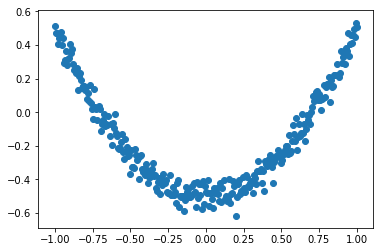

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()#本次运行请注释，全局运行不要注释
plt.show()

In [34]:
for i in range(1000):
    # 训练
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # 可视化结果并改进
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.show()
        plt.pause(0.1)